# I- Connection à votre drive pour lecture des données:

Cette étape est nécessaire seulement si vous travailler sous Clobal. Si vous travailler avec un aure éditeur python sur votre machine, il suffit de placer le fichier "pima.csv" dans votre répertoire de travail.

1- Créer sur votre drive google un répertoire au nom "data" et importer dedans le fichier pima.csv

2- Créer une connection à votre drive en exécutant le code suivant:

```
from google.colab import drive
drive.mount(‘/content/drive’)
```
4- Suivre les étapes de connection et copier le lien envoyé.
Si vous avez de difficultés, vous pouvez visualiser cette vidéo: https://youtu.be/TDyfhlg23vs



In [1]:
#céer une connection avec google colab
#from google.colab import drive
#drive.mount('/content/drive')



# II- Importation des données dans un frame pandas : 
Compléter le code suivant afin d’importer les données du fichier pima.csv et afficher les caractéristiques correspondantes.
1- Importer la librairie pandas

2- lire le fichier pima.csv (copier le chemin complet à partir de votre drive)

3- Afficher les dimensions de la table avec la propriété shape

4-afficher les colonnes et leurs types

In [2]:
#importer  la librairie Pandas
import pandas as pd
#lecture du fichier "prima.txt" avec la fonction read_csv de pandas
#header = 0, la première ligne correspond à l'entête (intitulé des champs)
pima = pd.read_csv('pima.csv', sep=',')
#afficher les dimensions de la table des données avec la fonction pima.shape
print(pima.shape ) 
#afficher la liste des colonnes pima.columns
print(pima.columns)
#afficher la liste des colonnes et leurs types avec la fonction dtypes
print(pima.dtypes)

(767, 9)
Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')
6          int64
148        int64
72         int64
35         int64
0          int64
33.6     float64
0.627    float64
50         int64
1          int64
dtype: object


#III- Préparation des données d'apprentissage

## 1- Séparation des input / Output
1. Transférer la table pandas dans une matrice Numpy. Utiliser la fonction as_matrix().

2. Séparer des données explicatives X (8 premières variables) et de la cible Y (dernière variable). Utiliser le slicing.

In [3]:
#transformation en matrice numpy seul reconnu par scikit learn
data = pima.to_numpy()
#séparation des données explicatives X et de la cible Y
#X matrice des var. explicatives [:,0:8]
x = data[:,0:8]
#Y vecteur de la variable à prédire
y = data[:,-1]

## 2- Scaling des données

Les variables dans l'échantillon Pima ont des échelles différentes. Pour que les techniques de classification s'appliquent correctement, il est conseillé  soit de normaliser (StandardScaler) soit de mettre à l'échelle 0-1 (Min-Max) toutes les variables. Dans ce cas, on vous suggère de tester les deux cas comme suit:
1. Séparer les données input X de l'output Y (Y ne 
doit pas être modifiée).
2. Appliquer la méthode StandardScalar() comme suit:
```
x_normalized=preprocessing.StandardScaler().fit_transform(x)
```
3. Appliquer la méthode MinMaxdScalar() comme suit:
```
x_scaled=preprocessing.MinMasScaler().fit_transform(x)
```

In [4]:
#importer le module preprocessing
from sklearn import preprocessing
#appliquer la normalisation de x
x_normalized = preprocessing.StandardScaler().fit_transform(x)
#appliquer le scaling de X 
x_scaled = preprocessing.MinMaxScaler().fit_transform(x)
#diminuer la dimension de x
from sklearn.decomposition import PCA
pca = PCA( n_components = 5, whiten = True).fit(x_normalized)
#pca = PCA(n_components = 5, whiten = true).fit()
data_pca = pca.transform(x)
#Afficher les premières lignes de X_normalized et x_scaled et noter l'intervalle des valeurs
x_normalized
x_scaled

array([[0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       [0.05882353, 0.44723618, 0.54098361, ..., 0.41877794, 0.03800171,
        0.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

## 3- Découpage des données

1. Découper  les données `x_nomalized` et `x_scaled` en données train et test avec la fonction **train_test_split** du module **model_selection** de pandas. La taille de l’échantillon test est égale à 300 (paramètre test_size de la fonction `train_test_split`).
Effectuer ce découpage afin de créer (x1_train, y1_train) à partir de  `x_nomalized` et (x2_train, y2_train) à partir de `x_scaled`.

2. Afficher les structures des ensembles crées en utilisant la propriété  `shape` de chaque vecteur.

In [5]:
#Subdivision des données en données train et test avec la fonction train_test_split du module model_selection de pandas
#importation du module model_selection de scikit learn
from sklearn import model_selection
from sklearn.model_selection import cross_validate
#from sklearn.model_selection import Shuffle_Split
#subdivision des données éch.test = 300 ; éch.app = 468
x1_train,x1_test,y1_train,y1_test =  model_selection.train_test_split(x_normalized,y,test_size = 300,random_state = 0)#à partir de x_normalized
x2_train,x2_test,y2_train,y2_test =  model_selection.train_test_split(x_scaled,y,test_size = 300,random_state = 0)   # à partir de x_scaled
x_train_pca,x_test_pca,y_train_pca,y_test_pca = model_selection.train_test_split(data_pca,y,test_size = 300,random_state = 0)
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)
print(x1_train)
print(y1_train)

(467, 8) (300, 8) (467,) (300,)
[[-0.84372629 -0.80917151 -0.47023757 ... -1.02619703 -0.63895586
  -0.95524792]
 [ 0.04683068  0.47377779  0.04641078 ... -0.10026481  2.14417835
  -0.95524792]
 [-0.84372629 -1.2785432  -0.72856175 ... -1.63502918 -0.64499303
  -1.0403932 ]
 ...
 [ 0.93738765 -0.21463403 -0.26357823 ... -0.58225693  0.78581567
   0.06649547]
 [ 0.64053533  0.12957188  0.3563998  ...  0.22951927 -1.058539
   1.76940112]
 [-0.54687397  0.25473767  0.25307013 ...  0.15341525  0.36019536
  -0.69981207]]
[0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 

# IV - Classification avec le modèle de régression logistique
Comme première approche de classification, nous utiliserons la régression logistique.

1-A partir du module `linear_model` du package sklearn, importer la classe `LogisticRegression`.

2- Créer une instance de la classe `LogisticRegression`.

3- Exécuter l'instance sur les données d'apprentissage `x1_train` afin de construire votre premier modèle prédictif que vous appellerez « modèle_LR1 ».  Pour ce faire, il faut exécuter la fonction fit de la classe LogisticRegression qui prend comme argument les ensembles les données explicatives `x1_train` et les données cibles `y1_train`. Refaire la même chose avec `x2_train` et `y1_train` pour obtenir le modèle « modèle_LR2 »

4- Appliquer les modèles générés sur les données tests `x_test` à travers la fonction `predict'.

5- Importer le module seaborn `import seaborn as sns`

6- Afficher la matrice de confusion.




In [6]:
#importer la classe LogisticRegression
from sklearn.linear_model import LogisticRegression
#création d'une instance de la classe
LR= LogisticRegression()
#exécution de l'instance sur les données d'apprentissage x1_train et x2_train
#c.à d . construction du modèle prédictif
modele_LR1=LR.fit(x1_train, y1_train)
modele_LR2=LR.fit(x2_train, y2_train)

#application des modèles sur les données test
y1_pred=modele_LR1.predict(x1_test)
y2_pred=modele_LR2.predict(x2_test)

#Calculer les scores des modèles
#Importer le module metric
from sklearn import metrics
model_lr1_score=metrics.accuracy_score(y1_pred, y1_test)
model_lr2_score=metrics.accuracy_score(y2_pred, y2_test)

#Affichier les ascores Que remarquez vous?
print(model_lr1_score)
print(model_lr2_score)

#
#importer le module seaborn (pour la matrice de confusion)
import seaborn as sns
#création de la matrice de confusion
matrix_LR1 = metrics.confusion_matrix(y1_test, y1_pred)
matrix_LR1

0.7766666666666666
0.77


C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([[184,  15],
       [ 52,  49]], dtype=int64)

In [7]:
matrix_LR2 = metrics.confusion_matrix(y2_test, y2_pred)
matrix_LR2

array([[183,  16],
       [ 53,  48]], dtype=int64)

Pour la suite du TP, vous garderez que les données normalisées (x1_train et y1_train) qui seront renommées x_train et x_test

In [8]:
x_train=x1_train
y_train=y1_train
x_test=x1_test
y_test=y1_test

# V- Classification par arbre de décision
Comme deusième approche de classification, nous utiliserons l'arbre de décision.

1-A partir du module tree du package sklearn, importer la classe DecisionTreeClassifier.

2- Créer une instance de la classe `DecisionTreeClassifier`.

3- Exécuter l'instance sur les données d'apprentissage `x_train` afin de construire votre deuxième modèle prédictif que vous appellerez « modèle_DT ».  Pour ce faire, il faut exécuter la fonction fit de la classe DecisionTreeClassifier qui prend comme argument les ensembles les données explicatives `x_train` et les données cibles `y_train`.

4- Appliquer le modèle généré sur les données tests `x_test` à travers la fonction `predict`.

5- Afficher la matrice de confusion.

In [9]:
#importer la classe decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier 
#création d'une instance de la classe
dt = DecisionTreeClassifier()
#exécution de l'instance sur les données d'apprentissage
#c.à d . construction du modèle prédictif
model_dt = dt.fit(x_train, y_train)
dt_pred = model_dt.predict(x_test)

#test du modèle sur les données test
score_dt = metrics.accuracy_score(dt_pred,y_test)
print(score_dt)
#création de la matrice de confusion
matrix_dt = metrics.confusion_matrix(y_test,dt_pred)
print(matrix_dt)

0.6966666666666667
[[154  45]
 [ 46  55]]


# VI- Classification par la forêt d'arbres
Comme troisième approche de classification, nous utiliserons un forêt d'arbre de décision.

1-A partir du module `ensemble` du package sklearn, importer la classe `RandomForestClassifier`.

2- Créer une instance de la classe `RandomForestClassifier`.

3- Exécuter l'instance sur les données d'apprentissage `x_train` afin de construire votre Troisième modèle prédictif que vous appellerez « modèle_RF ».  Pour ce faire, il faut exécuter la fonction fit de la classe RandomForestClassifier qui prend comme argument les ensembles les données explicatives `x_train` et les données cibles `y_train`.

4- Appliquer le modèle généré sur les données tests `x_test` à travers la fonction `predict`.

5- Afficher la matrice de confusion.

In [10]:
#importer la classe RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#création d'une instance de la classe
rf = RandomForestClassifier()
#exécution de l'instance sur les données d'apprentissage
#c.à d . construction du modèle prédictif
model_rf = rf.fit(x_train,y_train)
rf_pred = model_rf.predict(x_test)

#test du modèle sur les données test
score_rf = metrics.accuracy_score(y_test,rf_pred)
print(score_rf)
#création de la matrice de confusion
matrix_rf = metrics.confusion_matrix(rf_pred,y_test)
print(matrix_rf)

0.77
[[171  41]
 [ 28  60]]


# VII- Classification par les SVM
Comme quatrième approche de classification, nous utiliserons les SVM.

1-A partir du module `svm` du package sklearn, importer la classe `SVC`.

2- Créer une instance de la classe `SVC` de `sklearn.svm`.

3- Exécuter l'instance sur les données d'apprentissage `x_train` afin de construire votre quatrième modèle prédictif que vous appellerez « modèle_SVM ».  Pour ce faire, il faut exécuter la fonction fit de la classe SVC.

4- Appliquer le modèle généré sur les données tests `x_test` à travers la fonction `predict`.

5- Afficher la matrice de confusion.

In [11]:
#importer la classe SVC
from sklearn.svm import LinearSVC

#création d'une instance de la classe
svc = LinearSVC()

#exécution de l'instance sur les données d'apprentissage
#c.à d . construction du modèle prédictif
svc_model = svc.fit(x_train, y_train)

#appliquer le modèle sur les données test
svc_pred = svc_model.predict(x_test)
svc_score = metrics.accuracy_score(y_test,svc_pred)

#création et affichage de la matrice de confusion
matrix_svc = metrics.confusion_matrix(svc_pred,y_test)

print(svc_score)
print(matrix_svc)

0.7766666666666666
[[176  44]
 [ 23  57]]


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# VIII- Validation des modèles

1. Calculer le score de chaque modèle généré et l'ajouter dans une liste

2. Afficher la courbe des scores "AccuracyScore"

Comparer les résultats

[0.7766666666666666, 0.6966666666666667, 0.77, 0.7766666666666666]


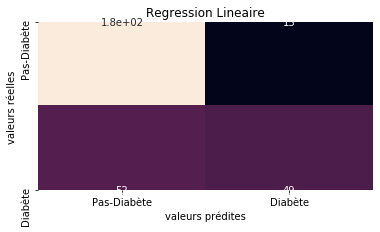

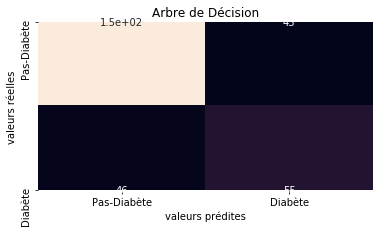

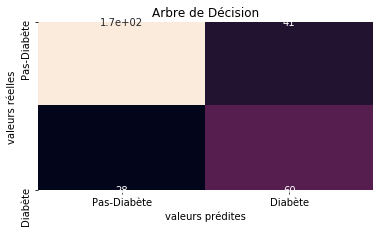

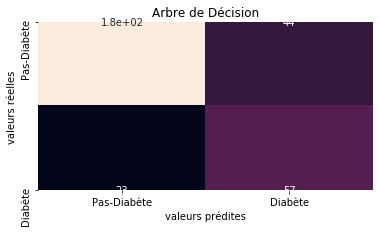

In [12]:
#Calculer les accuracy des modèles
List_des_score = []

#Ajouter tous les scores à une liste
List_des_score.append(model_lr1_score)
List_des_score.append(score_dt)
List_des_score.append(score_rf)
List_des_score.append(svc_score)
print(List_des_score)

#Importer Pyplot
import matplotlib.pyplot as plt

labels= ['Pas-Diabète','Diabète']
# Regression Logistique
sns.heatmap(matrix_LR1, square=True, annot=True, cbar=False

            , xticklabels=list(labels)

            , yticklabels=list(labels))

plt.xlabel('valeurs prédites')

plt.ylabel('valeurs réelles');

plt.title('Regression Lineaire')

plt.show()

#Arbres de Décision
sns.heatmap(matrix_dt, square=True, annot=True, cbar=False

            , xticklabels=list(labels)

            , yticklabels=list(labels))

plt.xlabel('valeurs prédites')

plt.ylabel('valeurs réelles');

plt.title("Arbre de Décision")

plt.show()
# Random forest
sns.heatmap(matrix_rf, square=True, annot=True, cbar=False

            , xticklabels=list(labels)

            , yticklabels=list(labels))

plt.xlabel('valeurs prédites')

plt.ylabel('valeurs réelles');

plt.title("Arbre de Décision")

plt.show()

#SVC
sns.heatmap(matrix_svc, square=True, annot=True, cbar=False

            , xticklabels=list(labels)

            , yticklabels=list(labels))

plt.xlabel('valeurs prédites')

plt.ylabel('valeurs réelles');

plt.title("Arbre de Décision")

plt.show()



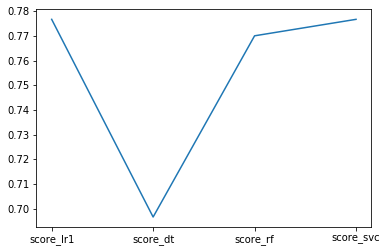

In [13]:
#Afficher la liste des scores dans une courbe
les_scores = List_des_score
nom_de_x = ['score_lr1','score_dt','score_rf','score_svc']
plt.plot(nom_de_x,les_scores)


In [14]:
#challengedata.ens.fr

IX - Validation croisée
Reprendre l'étape III-3 pour tester maintenant les modèles avec la validation croisée.
```
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)
```
Les modèles d'apprentissage sont ensuite appliqués sur les échantillons des données (ex pour Logistic Regression) 
```
cv_results = cross_validate(
    LogisticRegression, x_train, x_test, cv=cv, scoring="accuracy_score")
```



#  =======================ValidationCroisée======================

In [15]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

Logistique Regression

In [16]:
#subdivision des données en 30 échantillons
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
for train_index, test_index in cv.split(x_normalized):
#print("Train :", train_index, "Test :", test_index)
        x_train=x[train_index]
        y_train=y[train_index]
        x_test=x[test_index]
        y_test=y[test_index]
        lr = LogisticRegression(solver="liblinear", class_weight="balanced")
        lr.fit(x_train,y_train)
        y_pred_cv_lr=lr.predict(x_test)
        cm_cv_lr = metrics.confusion_matrix(y_test, y_pred_cv_lr)
print(cm_cv_lr)
acc_cv_lr = metrics.accuracy_score(y_pred_cv_lr,y_test)
print(acc_cv_lr)

[[111  42]
 [ 24  54]]
0.7142857142857143


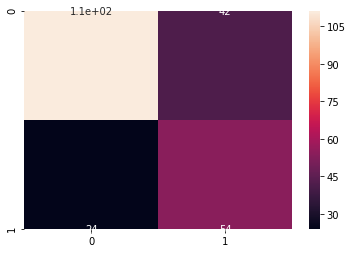

In [17]:
graphe_cm_cv_lr=sns.heatmap(cm_cv_lr,annot=True)

SVM

In [18]:
svc= LinearSVC()
model_cv_svc=svc.fit(x_train, y_train)
#appliquer le modèle sur les données tesb
y_pred_cv_svc=model_cv_svc.predict(x_test)
cm_cv_svc = metrics.confusion_matrix(y_test,y_pred_cv_svc)
acc_cv_svc = metrics.accuracy_score(y_pred_cv_svc,y_test)
print(cm_cv_svc)
print(acc_cv_svc)

[[80 73]
 [18 60]]
0.6060606060606061


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


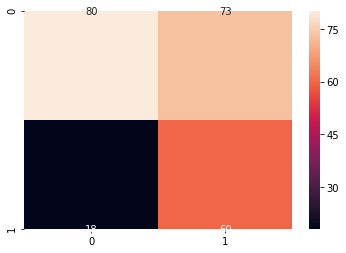

In [19]:
graphe_cm_cv_svc=sns.heatmap(cm_cv_svc,annot=True)

Decison Tree

In [20]:
dt = DecisionTreeClassifier()
model_cv_dt = dt.fit(x_train, y_train)
y_pred_cv_dt = model_cv_dt.predict(x_test)
acc_cv_dt = metrics.accuracy_score(y_pred_cv_dt,y_test)
cm_cv_dt = metrics.confusion_matrix(y_test,y_pred_cv_dt)
print(cm_cv_dt)
print(acc_cv_dt)

[[114  39]
 [ 33  45]]
0.6883116883116883


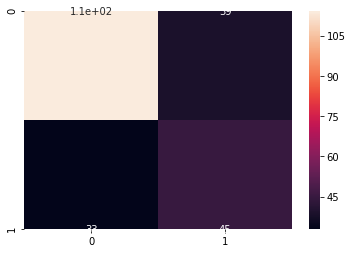

In [21]:
graphe_cm_cv_dt=sns.heatmap(cm_cv_dt,annot=True)

Forest Aleatoire

In [22]:
rf = RandomForestClassifier()
model_cv_rf = rf.fit(x_train,y_train)
y_pred_cv_rf = model_cv_rf.predict(x_test)
acc_cv_rf = metrics.accuracy_score(y_test,y_pred_cv_rf)
cm_cv_rf = metrics.confusion_matrix(y_pred_cv_rf,y_test)
print(cm_cv_rf)
print(acc_cv_rf)

[[129  32]
 [ 24  46]]
0.7575757575757576


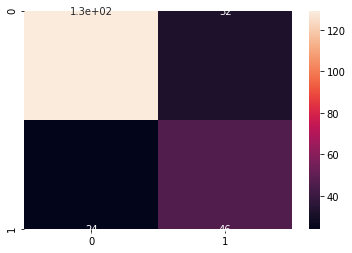

In [23]:
graphe_cm_cv_rf=sns.heatmap(cm_cv_rf,annot=True)

In [24]:
List_des_scores_cv = []
List_des_scores_cv.append(acc_cv_lr)
List_des_scores_cv.append(acc_cv_svc)
List_des_scores_cv.append(acc_cv_dt)
List_des_scores_cv.append(acc_cv_rf)
print(List_des_scores_cv)

[0.7142857142857143, 0.6060606060606061, 0.6883116883116883, 0.7575757575757576]


In [25]:
Les_scores_cv = List_des_scores_cv
nom_de_cv_x = ['score_lr1','score_dt','score_rf','score_svc']

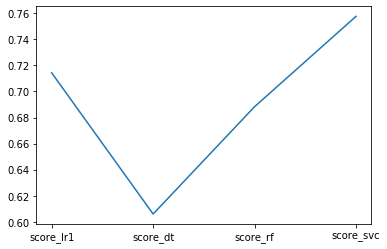

In [26]:
plt.plot(nom_de_cv_x,Les_scores_cv)

# ==============Réduction de dimension(PCA)================

# dt_PCA 

In [27]:
print(pca.components_)

[[ 0.12631788  0.39243328  0.35947089  0.44054292  0.43683384  0.45215652
   0.27060956  0.1955599 ]
 [ 0.59404237  0.17528237  0.18550652 -0.33140493 -0.24788907 -0.09918102
  -0.12154879  0.6213597 ]
 [-0.01373196  0.46859457 -0.53520861 -0.23837958  0.33708345 -0.36182269
   0.43221831  0.0748592 ]
 [ 0.08158945 -0.40414775  0.05653763  0.03677036 -0.34804809  0.05305254
   0.83449461  0.07159535]
 [-0.47535915  0.46613059  0.32772515 -0.48726778 -0.34781321  0.2542284
   0.11966157 -0.10953212]]


In [28]:
dt = DecisionTreeClassifier()
model_pca_dt = dt.fit(x_train_pca, y_train_pca)
y_pred_pca_dt = model_pca_dt.predict(x_test_pca)
acc_pca_dt = metrics.accuracy_score(y_pred_pca_dt,y_test_pca)
cm_pca_dt = metrics.confusion_matrix(y_test_pca,y_pred_pca_dt)
print(cm_pca_dt)
print(acc_pca_dt)

[[155  44]
 [ 46  55]]
0.7


In [29]:
print(cm_pca_dt)
print(acc_pca_dt)

print(matrix_dt)
print(score_dt)

[[155  44]
 [ 46  55]]
0.7
[[154  45]
 [ 46  55]]
0.6966666666666667


# lr_PCA

In [30]:
model_pca_lr = lr.fit(x_train_pca, y_train_pca)
y_pred_pca_lr = model_pca_lr.predict(x_test_pca)
acc_pca_lr = metrics.accuracy_score(y_pred_pca_lr,y_test_pca)
cm_pca_lr = metrics.confusion_matrix(y_test_pca,y_pred_pca_lr)
print(cm_pca_lr)
print(acc_pca_lr)

[[151  48]
 [ 27  74]]
0.75


In [31]:
print(cm_pca_lr)
print(acc_pca_lr)

print(matrix_LR1)
print(model_lr1_score)

[[151  48]
 [ 27  74]]
0.75
[[184  15]
 [ 52  49]]
0.7766666666666666


# rf_PCA

In [32]:
model_pca_rf = rf.fit(x_train_pca, y_train_pca)
y_pred_pca_rf = model_pca_rf.predict(x_test_pca)
acc_pca_rf = metrics.accuracy_score(y_pred_pca_rf,y_test_pca)
cm_pca_rf = metrics.confusion_matrix(y_test_pca,y_pred_pca_rf)
print(cm_pca_rf)
print(acc_pca_rf)

[[162  37]
 [ 44  57]]
0.73


In [33]:
print(matrix_rf)
print(score_rf)

[[171  41]
 [ 28  60]]
0.77


# svm_PCA

In [34]:
model_pca_svc = svc.fit(x_train_pca, y_train_pca)
y_pred_pca_svc = model_pca_svc.predict(x_test_pca)
acc_pca_svc = metrics.accuracy_score(y_pred_pca_svc,y_test_pca)
cm_pca_svc = metrics.confusion_matrix(y_test_pca,y_pred_pca_svc)
print(cm_pca_svc)
print(acc_pca_svc)

[[198   1]
 [ 96   5]]
0.6766666666666666


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [35]:
print(matrix_svc)
print(svc_score)

[[176  44]
 [ 23  57]]
0.7766666666666666


# Ensemble d'apprentissage

Creation d'un ensemble d'apprentissage

In [36]:
n_estimators = 68
from sklearn.ensemble import VotingClassifier
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
from sklearn.ensemble import BaggingClassifier
lr = LogisticRegression()
rf = RandomForestClassifier()
svc = LinearSVC()
dt = DecisionTreeClassifier()
bg = BaggingClassifier()
voting_cl = VotingClassifier(
    estimators=[('dt',dt),('lr',lr),('rf',rf),('svc',svc),('knn',knn),('bg',bg)],
    voting = 'hard')
model_vot_cl = voting_cl.fit(x_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
#exactitude de chacun des classifieurs sur le jeu d'entrainement
from sklearn.metrics import accuracy_score
for clf in (lr,dt,svc,knn,bg,voting_cl):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


LogisticRegression 0.7575757575757576
DecisionTreeClassifier 0.7056277056277056
LinearSVC 0.6190476190476191
KNeighborsClassifier 0.7359307359307359
BaggingClassifier 0.7532467532467533
VotingClassifier 0.7489177489177489


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
